In [23]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [57]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        labels = [] #np.empty(shape=)
        images = []
        for i, row in enumerate(training_file.readlines()):
            if i != 0:
                row = row.split(',')
                labels.append(row[0])
                images.append(row[1:785])        
        labels = np.array(labels, dtype='float32')
        images = np.array(images, dtype='float32').reshape((-1,28,28))
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [76]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=4)
testing_images = np.expand_dims(testing_images, axis=4)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255 # horizontal_flip=True #, rotation_range=0.2, width_shift_range=0.2, height_shift_range=0.2, brightness_range=[0.0, 0.3], shear_range=0.2, zoom_range=0.2
    )

validation_datagen = ImageDataGenerator(
    rescale=1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [86]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # 1st Conv & Pooling
    tf.keras.layers.Conv2D(filters=256, kernel_size=(4,4), activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
#     # 2nd Conv & Pooling
    tf.keras.layers.Conv2D(filters=512, kernel_size=(2,2), activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=2048, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(units=256, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(units=25, activation='softmax')], name='Exercise_4_model'
    )
model.summary()
# # # Compile Model. 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # # # Train the Model
history = model.fit_generator(train_datagen.flow(x=training_images, y=training_labels), epochs = 2, steps_per_epoch=32, validation_data=validation_datagen.flow(x=testing_images, y=testing_labels))

model.evaluate(testing_images, testing_labels, verbose=0)

Model: "Exercise_4_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 25, 25, 256)       4352      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 11, 11, 512)       524800    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 5, 5, 512)         0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_72 (Dense)             (None, 2048)              26216448  
_________________________________________________________________
dense_73 (Dense)             (None, 256)          

[144.2413295356508, 0.555633]

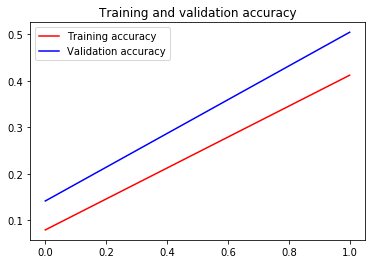

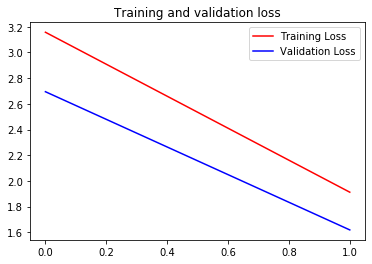

In [87]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);